#### Data Diri

**Nama:** Bayu Setiawan

**NIM:** 026

**Dataset:** [tf_flowers](https://www.tensorflow.org/datasets/catalog/tf_flowers)

In [143]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential, layers

### 1. Klasifikasi data tf_flowers

Di sini kita membagi data `train=70%` dan `test=30%`

In [84]:
(train_ds_raw, train_labels_raw), (test_ds_raw, test_labels_raw) = tfds.load(
    "tf_flowers",
    split=["train[:70%]", "train[:30%]"],
    batch_size=-1,
    as_supervised=True,  # Include labels
)

### 2. Encoding Label pada Gambar

Image pada dataset tadi diubah menjadi `28x28` yang kemudian diubah menjadi 2D yaitu untuk training `(2569, 2352)` dan testing `(1101, 2352)`

Untuk classes nya sendiri adalah 5

In [151]:
train_ds = tf.image.resize(train_ds_raw, (28, 28))
test_ds = tf.image.resize(test_ds_raw, (28, 28))

train_ds = np.reshape(train_ds.numpy(), (2569, 2352))
test_ds = np.reshape(test_ds.numpy(), (1101, 2352))

train_labels = tf.keras.utils.to_categorical(train_labels_raw, num_classes=5)
test_labels = tf.keras.utils.to_categorical(test_labels_raw, num_classes=5)

(1101, 2352)

### 3. Tampilan Dataset

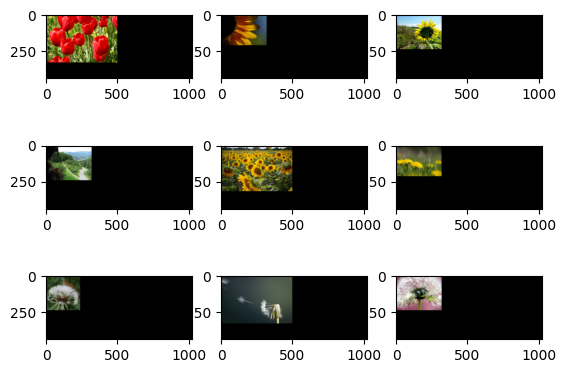

In [86]:
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(train_ds_raw[i])
plt.show()

### 4. Pembuatan Model

Hidden layer di sini ada 3 layer dengan output layer memiliki jumlah neuron berupa 5 sesuai dengan classes di atas

In [164]:
model = Sequential(
  [
    layers.Dense(256, activation='relu', input_dim=2352),
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(5, activation='softmax')
  ]
)

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 256)               602368    
                                                                 
 dense_67 (Dense)            (None, 128)               32896     
                                                                 
 dense_68 (Dense)            (None, 32)                4128      
                                                                 
 dense_69 (Dense)            (None, 5)                 165       
                                                                 
Total params: 639,557
Trainable params: 639,557
Non-trainable params: 0
_________________________________________________________________


### 5. Compile Model

Karena data kita memiliki lebih daripada 2 kategori, maka kita akan menggunakan loss `categorical_crossentropy`

In [165]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

### 6. Training Model

Kita akan menggunakan `batch_size=32` dan `epochs=50`

Hasil training yang diberikan adalah `loss: 0.2734 - accuracy: 0.9015`

In [166]:
model.fit(train_ds, train_labels, batch_size=32, epochs=50)

Epoch 1/50
81/81 [==============================] - 1s 5ms/step - loss: 13.6865 - accuracy: 0.2546
Epoch 2/50
81/81 [==============================] - 0s 5ms/step - loss: 4.6723 - accuracy: 0.3227
Epoch 3/50
81/81 [==============================] - 0s 6ms/step - loss: 2.9564 - accuracy: 0.3807
Epoch 4/50
81/81 [==============================] - 0s 5ms/step - loss: 1.8010 - accuracy: 0.4360
Epoch 5/50
81/81 [==============================] - 0s 5ms/step - loss: 1.4273 - accuracy: 0.4944
Epoch 6/50
81/81 [==============================] - 0s 6ms/step - loss: 1.4034 - accuracy: 0.5060
Epoch 7/50
81/81 [==============================] - 0s 5ms/step - loss: 1.3058 - accuracy: 0.5344
Epoch 8/50
81/81 [==============================] - 0s 6ms/step - loss: 1.1273 - accuracy: 0.5773
Epoch 9/50
81/81 [==============================] - 0s 5ms/step - loss: 1.0669 - accuracy: 0.5932
Epoch 10/50
81/81 [==============================] - 0s 5ms/step - loss: 0.9763 - accuracy: 0.6255
Epoch 11/50
81/81 

### 7. Evaluasi Data

Hasil evaluasi adalah ` loss: 0.2488 - accuracy: 0.9146`

In [167]:
model.evaluate(test_ds, test_labels)

35/35 [==============================] - 0s 3ms/step - loss: 0.2488 - accuracy: 0.9146


[0.2488485872745514, 0.9146230816841125]